## Representing EC by prime series

In [210]:
import pandas as pd

dffile = "./data/ec_rk0-2_cond1000-10000.csv"

df = pd.read_csv(dffile)
df

,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,a991,a992,a993,a994,a995,a996,a997,a998,a999,a1000
0,1001.b1,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
1,1001.b2,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
2,1001.b3,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
3,1001.b4,0,1001,-1,0,-2,-1,1,-1,-2,...,-30,-78,100,-18,-90,136,-132,-106,-100,-48
4,1002.a1,0,1002,-1,-1,0,0,0,-4,6,...,50,154,152,-34,74,128,102,-96,116,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,1,-1,-4,1,-4,-6,-1,...,-144,99,77,146,-36,108,72,-122,126,-49
59569,9963.c1,2,9963,0,0,-2,-4,2,-1,-2,...,94,-14,139,-127,36,-64,-88,42,114,-12
59570,9966.c1,2,9966,1,-1,-3,-4,-1,-3,-4,...,96,108,32,66,-46,-21,-67,110,94,86
59571,9978.a1,2,9978,-1,-1,-2,-1,-1,-2,-5,...,-117,31,174,101,-126,47,-111,21,54,-86


First, recall the 'murmuration' plots, showing the series average a-values at each rank:

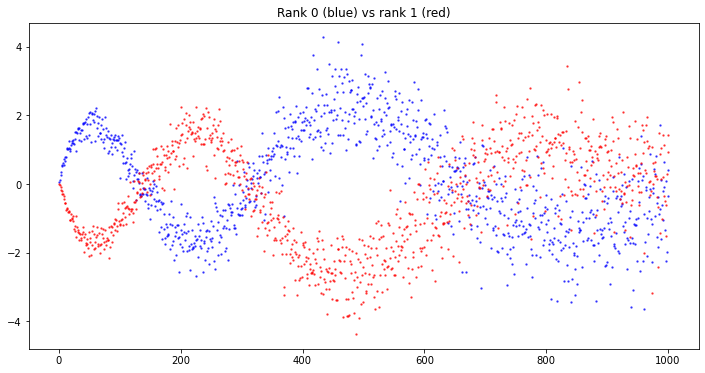

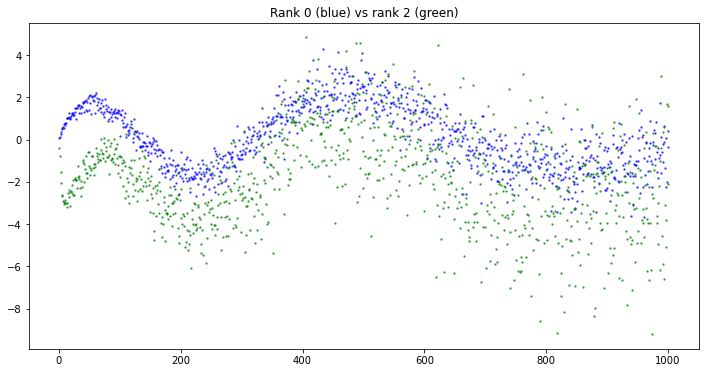

In [211]:
import numpy as np
from matplotlib import pyplot as plt

rg = range(1,1001)
murmur = []
for r in range(3):
    murmur += [[np.mean(df['a'+str(i)][(df["rank"]==r) & (df["conductor"]>5000)]) for i in rg]]

plt.figure(figsize=(12,6))
plt.scatter(rg, murmur[0], s = 2, alpha = 0.6, c='blue')
plt.scatter(rg, murmur[1], s = 2, alpha = 0.6, c='red')
plt.title("Rank 0 (blue) vs rank 1 (red)")
plt.show()
plt.figure(figsize=(12,6))
plt.scatter(rg, murmur[0], s = 2, alpha = 0.6, c='blue')
plt.scatter(rg, murmur[2], s = 2, alpha = 0.6, c='green')
plt.title("Rank 0 (blue) vs rank 2 (green)")
plt.show()

Note, however, that this _average_ behaviour is swamped by the variance: the first few standard deviations look like: 

0.05226598327488535 +/- 0.8092437806730405
0.11586188292419747 +/- 1.0754184161068012
0.2505395198273537 +/- 1.7464026319675465
0.3625573239816563 +/- 2.2898730241736223
0.5232667925546264 +/- 3.0837270198887325
0.5427569463177772 +/- 3.503147955182878
0.6120852441327219 +/- 4.0437711188147585
0.5503102239007284 +/- 4.270537175176563
0.7201240895602914 +/- 4.672628594590332


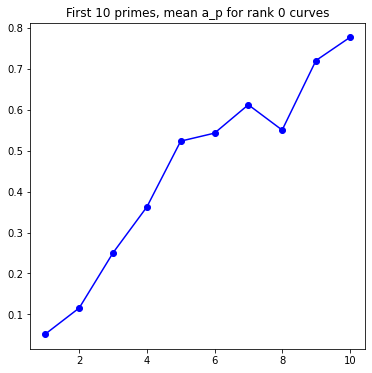

In [212]:
size = 10

for i in range(1,size):
    df_0 = df['a'+str(i)][(df["rank"]==0) & (df["conductor"]>5000)]
    print(f'{np.mean(df_0)} +/- {np.std(df_0)}')
    
plt.figure(figsize=(6,6))
plt.plot(rg[:size], murmur[0][:size], 'b-o')
plt.title("First 10 primes, mean a_p for rank 0 curves")
plt.show()

Do we see the (mean) pattern at individual curves? As suggested by the variance, no we don't!

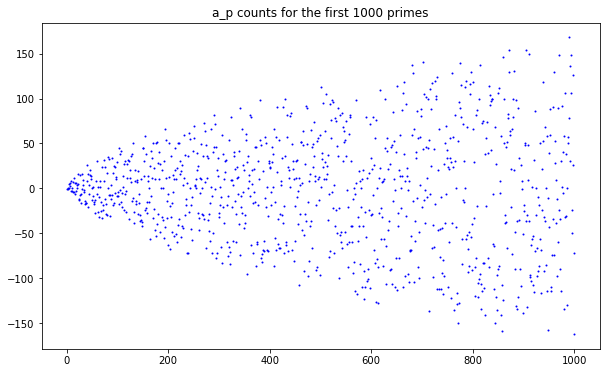

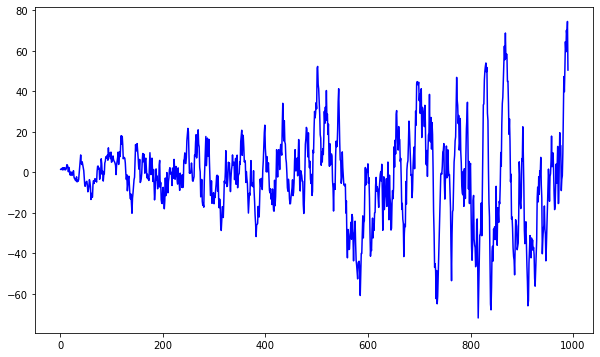

Initial values of MA (window size 10): [1.5, 1.7]
Initial MAs (window size up to 5): [-1.0, -1.0, -0.6666666666666666, 0.75, 0.8]


In [219]:
def moving_average(a, wsize = 10):
    n = len(a)
    ma = [np.mean([a[b+i] for i in range(wsize)]) 
          for b in range(n-wsize)]
    return ma

# choose random curve
i = randint(0,df.shape[0]+1)

# extract series
nprimes = 1000
rg = range(1,nprimes+1)

v = ['a'+str(j) for j in range(1,nprimes+1)]
a = list( df[v].iloc[i] )

# colour by rank
if df["rank"].iloc[i]==0:
    c = 'blue'
else:
    c = 'red'

# plot series
plt.figure(figsize=(10,6))
plt.scatter(rg, a, s=1.0, c=c)
plt.title("a_p counts for the first 1000 primes")
plt.show()

# plot moving average
ma = moving_average(a, wsize = 10)
x = rg[0:len(ma)]

plt.figure(figsize=(10,6))
plt.plot(x, ma, c)
plt.show()

print(f'Initial values of MA (window size 10): {ma[:2]}')

mas = [moving_average(a, wsize = ws)[0] for ws in range(1,6)]
print(f'Initial MAs (window size up to 5): {mas}')

## Fitting the murmuration curves

Bit of a pig's ear at first pass - need to figure this out:

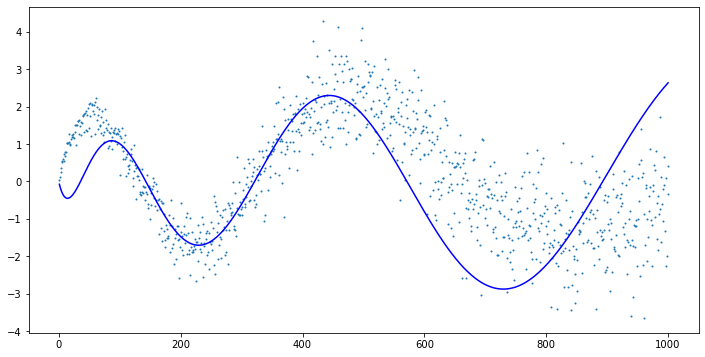

Fitted curve y = -0.1491 x^0.4491 sin(0.5257 x^0.5)


In [208]:
from scipy.optimize import curve_fit

def esin(x,a,b,c):
    #return a * np.power(x,b) * np.sin(c * np.power(x,d))
    return a * np.power(x,b) * np.sin(c * np.sqrt(x))

xdata = rg
ydata = np.array([murmur[0][i-1] for i in xdata])

guess = [1,1, 2*np.pi/15]
popt, pcov = curve_fit(esin, xdata[:500], ydata[:500], guess)

yfit = np.array([esin(x, *popt) for x in xdata])

plt.figure(figsize=(12,6))
plt.scatter(xdata, ydata, s=1.0)
plt.plot(xdata, yfit, 'b-')
plt.show()

print(f'Fitted curve y = {round(popt[0],4)} x^{round(popt[1],4)} sin({round(popt[2],4)} x^0.5)')